In [1]:
import oceanwaves as ow
import numpy as np

In [2]:
Sp0 = ow.Spec1()
Sp0.Tp    = 10;
Sp0.Hm0   = 1;

$$ H_{m0} = p_m*\gamma^np.exp(-0.5*(T_p*f-1)^2./\sigma(f,1/T_p,s_a,s_b)^2);$$

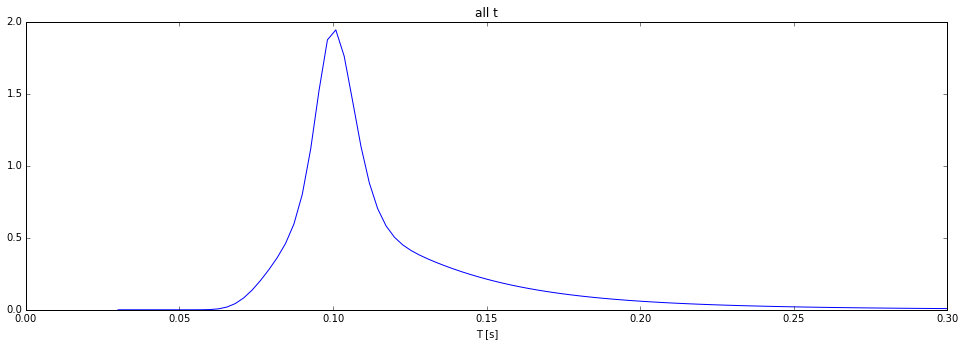

In [3]:
# 1D JONSWAP
Sp1       = ow.Spec1()
Sp1.f     = np.linspace(0.03,.3,100)
Sp1.from_jonswap(Sp0.Hm0, Sp0.Tp)
Sp1.Hm0()

# Plot spectra example: E(f) for all t
# Note the package function Spec1.plot().
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.plot(Sp1.f,Sp1.energy)
ax.set_title('all t')
ax.set_xlabel('T [s]')

$$(2^m_s) * (\gamma(m_s/2+1))^2 / (pi * \gamma(m_s+1))$$

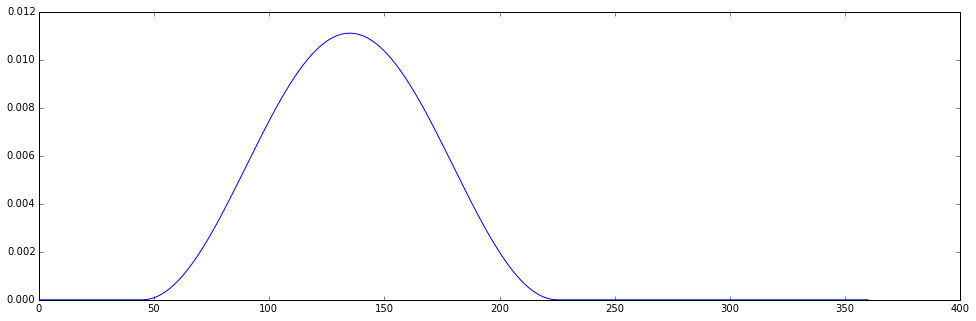

In [4]:
# DIRECTIONAL SPREADING
pdir = 90+45
ms = 2
units = 'deg'
dirs = [0,] + list(45+np.arange(0,136)*2.) + [360,]
cdir = ow.directional_spreading(dirs,pdir,ms,units)
# Plot spectra example: E(f) for all t
# Note the package function Spec1.plot().
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)
ax = plt.axes([0.1,.2,0.8,0.4])
plt.plot(dirs,cdir)

In [5]:
help(ow)

Help on module oceanwaves:

NAME
    oceanwaves - Module for handling spectral ocean wave data.

CLASSES
    builtins.object
        Spec0
        Spec1
        Spec2
    
    class Spec0(builtins.object)
     |  Class for spectral parameters
     |  
     |  Methods defined here:
     |  
     |  __init__(self)
     |  
     |  __repr__(self)
     |  
     |  from_Spec(self, Spec)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if defined)
    
    class Spec1(builtins.object)
     |  Class for 1D spectra. Array shape is temporal series for a list of points.
     |      Example
     |      Sp1 = Spec1()
     |      Sp1.f = np.linspace(0.03,.3,100)
     |  
     |  Methods defined here:
     |  
     |  Hm0(self)
     |      Integrate Hm0 (Hs) fr